In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.
The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

In [2]:
#Load the dataset
df_realE = pd.read_csv('data/real_estate.csv')

The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

In [3]:
df_realE.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df_realE.dtypes
    

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

### Explore the data

#### View the distribution of the label to predict

In [15]:
def seeDist(df,colname):
    numpyArrData=df[colname].to_numpy()
    mean=np.mean(numpyArrData)
    max=np.max(numpyArrData)
    min=np.min(numpyArrData)
    median=np.median(numpyArrData)

    print("Min:"+str(min)+"\n Mean:"+str(mean)+"\n max:"+str(max)+"\n median:"+str(median))

    print("Per 1:"+str(np.percentile(numpyArrData, 1))+"\n Per 5:"+str(np.percentile(numpyArrData, 5))+"\n Per 10:"+str(np.percentile(numpyArrData, 10)))

    print("Per 90:"+str(np.percentile(numpyArrData, 90))+"\n Per 95:"+str(np.percentile(numpyArrData, 95))+"\n Per 99:"+str(np.percentile(numpyArrData, 99)))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,8))
    # Plot the histogram   
    ax[0].hist(numpyArrData,bins=200)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median
    ax[0].axvline(x=mean, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)

    ax[0].axvline(x=np.percentile(numpyArrData, 1), color = 'blue', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 5), color = 'blue', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 10), color = 'blue', linestyle=':', linewidth = 2)


    ax[0].axvline(x=np.percentile(numpyArrData, 99), color = 'black', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 95), color = 'black', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 90), color = 'black', linestyle=':', linewidth = 2)
    # Plot the boxplot   
    ax[1].boxplot(numpyArrData, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle(df[colname].name)
    fig.show()

Min:7.6
 Mean:37.980193236714975
 max:117.5
 median:38.45
Per 1:12.8
 Per 5:16.490000000000002
 Per 10:21.02
Per 90:54.94
 Per 95:59.17499999999998
 Per 99:70.88300000000001


C:\Users\super\AppData\Local\Temp\ipykernel_8064\2736674870.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


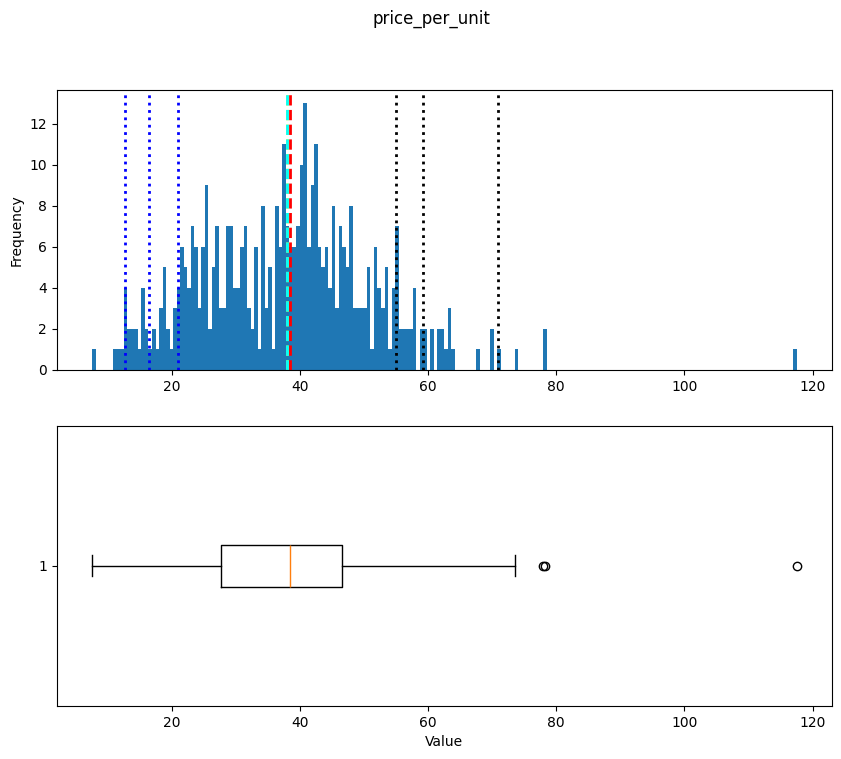

In [16]:
seeDist(df_realE,"price_per_unit")


### Outliers

Min:7.6
 Mean:37.421515892420544
 max:70.1
 median:38.3
Per 1:12.8
 Per 5:16.340000000000003
 Per 10:20.9
Per 90:53.99999999999999
 Per 95:57.919999999999995
 Per 99:63.3


C:\Users\super\AppData\Local\Temp\ipykernel_8064\2736674870.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


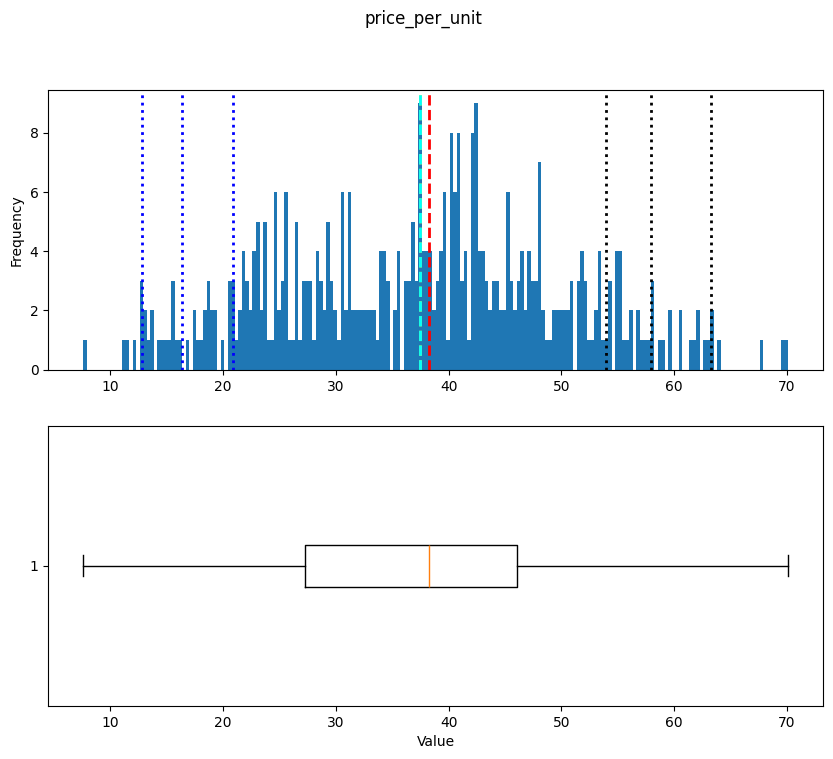

In [17]:
df_realE_WOOliers=df_realE[df_realE["price_per_unit"]<np.percentile(df_realE["price_per_unit"].to_numpy(), 99)]
seeDist(df_realE_WOOliers,"price_per_unit")

### Varible correlation

In [18]:
import seaborn as sns

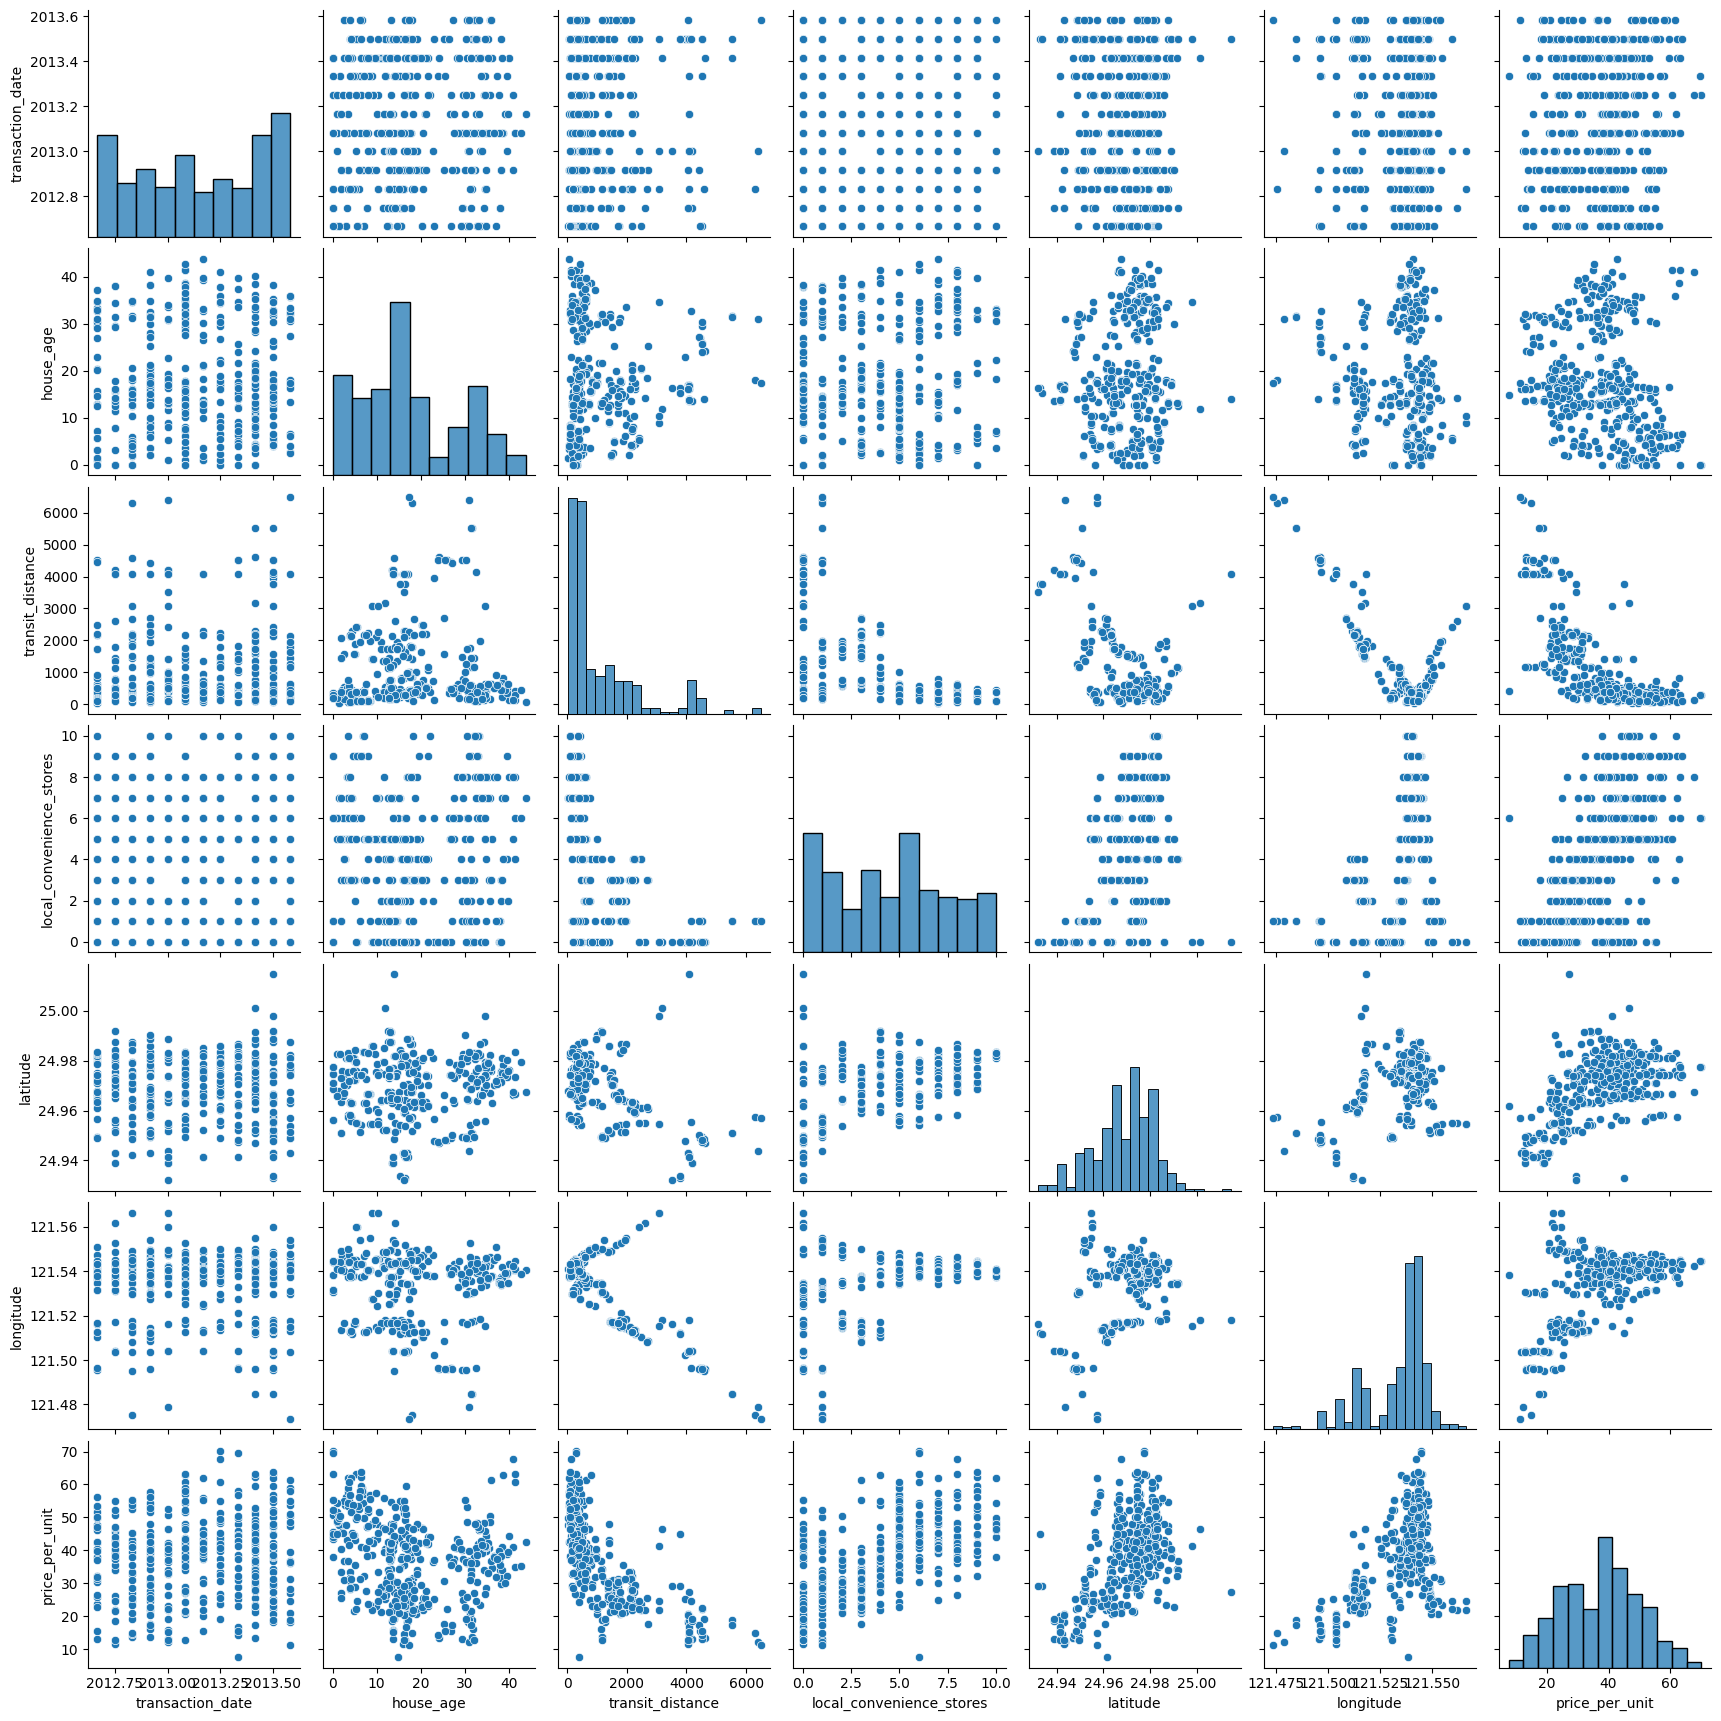

In [21]:
sns.pairplot(df_realE_WOOliers)

<Axes: >

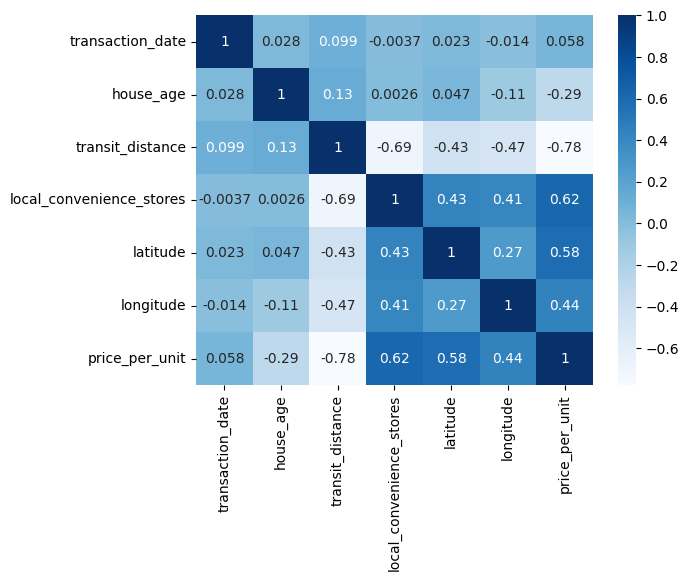

In [26]:
sns.heatmap(df_realE_WOOliers.corr(numeric_only=True, method='spearman'), annot=True, cmap='Blues')


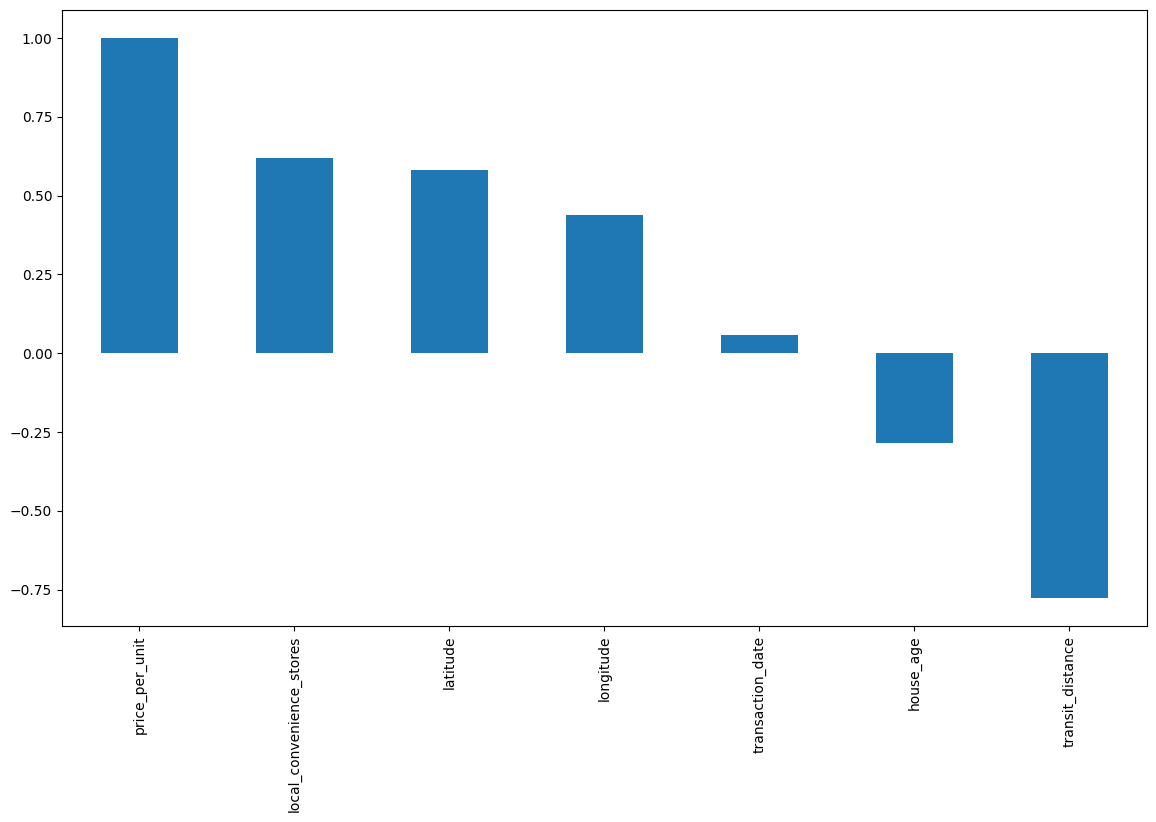

In [28]:
plt.figure(figsize=(14,8))
#bars = houses.corr(numeric_only=True, method='spearman')['price'].sort_values(ascending=False).plot(kind='bar')
bars = df_realE_WOOliers.corr(numeric_only=True, method='spearman')['price_per_unit'].sort_values(ascending=False).plot(kind='bar')


### Separate features and label and split data for training and validation


In [29]:
# Separate features 
#We eill not use the col transaction_date
X, y = df_realE_WOOliers[df_realE_WOOliers.columns[1:-1]].values, df_realE_WOOliers[df_realE_WOOliers.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


### Normalizing the data

In [30]:
df_realE_WOOliers.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

In [31]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])


### Experiment with distinct regression models:

In [56]:
#Create a list with the unctions of the regression models:
regModList=[RandomForestRegressor(),GradientBoostingRegressor(),LinearRegression(),
            Lasso(),DecisionTreeRegressor()]

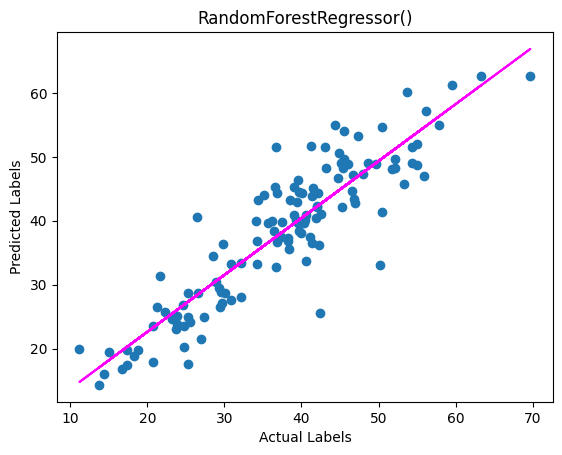

MSE: 26.54018012447148
RMSE: 5.15171623097308
R2: 0.8014213807675428
////////////////////////////////////////////////


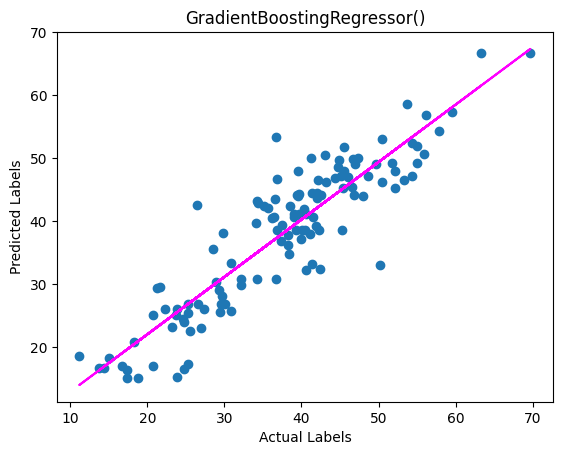

MSE: 26.24688742169106
RMSE: 5.123171617434952
R2: 0.8036158519307354
////////////////////////////////////////////////


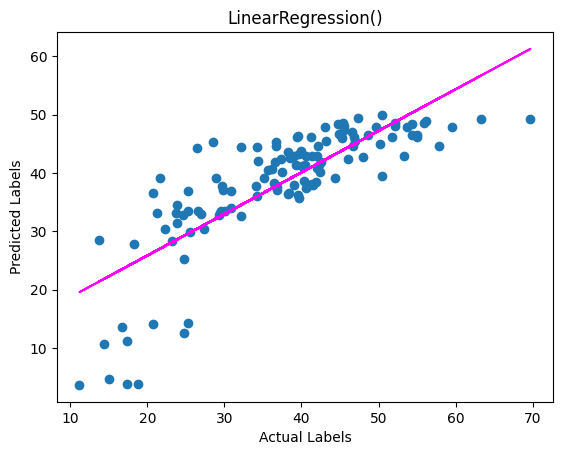

MSE: 51.27510892011363
RMSE: 7.1606639999453705
R2: 0.6163499914998114
////////////////////////////////////////////////


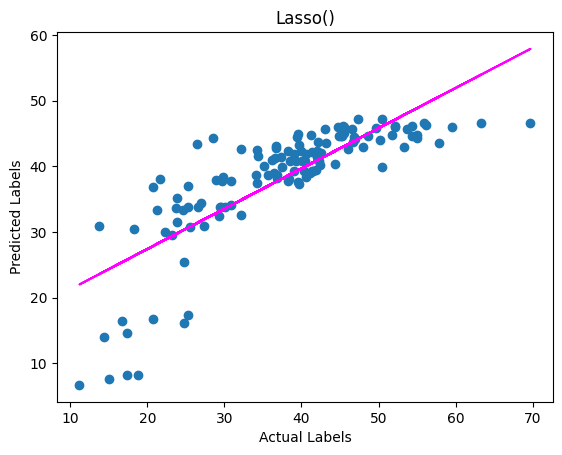

MSE: 50.29216775334569
RMSE: 7.091697099661384
R2: 0.62370454217611
////////////////////////////////////////////////


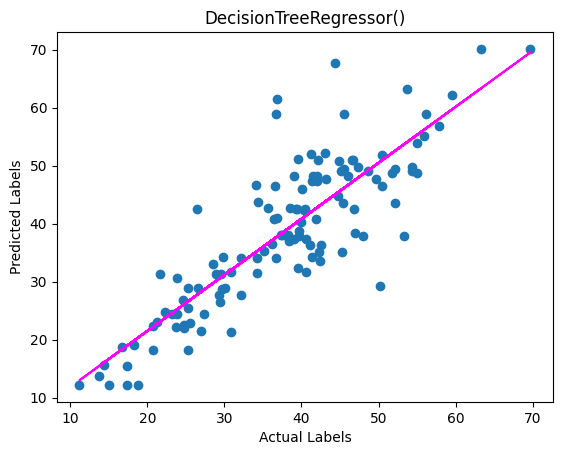

MSE: 46.02079719963866
RMSE: 6.78386299976928
R2: 0.6556637399964456
////////////////////////////////////////////////


In [57]:
for regressor in regModList:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])
    # fit the pipeline to train a linear regression model on the training set
    RFmodel = pipeline.fit(X_train, (y_train))
    
    # Get predictions
    predictions = RFmodel.predict(X_test)
    
    # Plot predicted vs actual
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title(str(regressor))
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()
    
    # Display metrics
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, predictions)
    print("R2:", r2)
    print("////////////////////////////////////////////////")